# Project: Investigate the Life Science of Different Countries around Income Per Capita

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains data for different life topics of more than 100 countries. Specifically, the merged dataset I made includes these topics with detailed explanations as following:

><li> Children per woman total_fertility : the number of children that would be born to each woman with prevailing age </li>
><li> Income per person : GDP/capita </li>
><li> Internet users : Individuals using the Internet as % of population </li>
><li> Life expectancy (years) : the average number of years a newborn child would live if current mortality patterns were to stay the same </li>


> The purpose of this dataset is to find out the relationship between income per person and other three variables. The questions I propose to ask with this dataset are:
>1. Do bigger increases of income per person lead to greater changes of life expectancy worldwide? 
>2. Does higher GDP per capita lead to the result of more children being concieved in a household worldwide?
>3. What is the difference of Internet users percentages between countries that have the highest and lowest income per person?
</ul>

<a id='wrangling'></a>
## Data Wrangling



### Import packages

In [1013]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

### How to clean the dataset

The raw datasets contain different time frames. To make the comparisons consistent, I extracted data from year 2012 to 2017 from each dataset to make more relevant conclustions. 

Since I wanted to compare scenarios within countries and between countries, I decide to calculate the change of each variable from 2012 to 2017 and the mean value of each variable through the years as the benchmarks. Therefore, the final visual would be a dataframe that contains the mean values of each variable and the difference of each variable from year 2012 to 2017. Since I will merge 6 dataframes into one, I decide to clean each dataset, calculate the change and mean values prior to merging them. While cleaning each dataset, I will also fill in null values with back-fill and forward-fill methods since each variable would not change tremendously within a year. Lastly, I will merge these dataframes into a completed dataset called df.





### Data Cleaning and merging
#### Dataset: children per woman

In [1016]:
#clean dataset: children per woman
df_children_per_woman = pd.read_csv('~/Downloads/children_per_woman_total_fertility.csv')
df_children_per_woman.set_index('country',inplace = True)

#find data from year 2012-2017
df_children_per_woman = df_children_per_woman.loc[:,'2012':'2017']
df_children_per_woman.rename(columns = lambda x: 'child_num_'+ x[-5:],inplace = True)

df_children_per_woman.head()

,child_num_2012,child_num_2013,child_num_2014,child_num_2015,child_num_2016,child_num_2017
country,,,,,,
Afghanistan,5.38,5.17,4.98,4.80,4.64,4.48
Albania,1.69,1.70,1.71,1.71,1.71,1.71
Algeria,2.94,2.92,2.89,2.84,2.78,2.71
Angola,6.00,5.92,5.84,5.77,5.69,5.62
Antigua and Barbuda,2.10,2.09,2.08,2.06,2.05,2.04


In [1017]:
#calculate mean values and difference between 2012 and 2017
data_child_mean = df_children_per_women.mean(axis = 1).round(2)
df_children_per_woman['child_num_mean'] = df_children_per_woman.mean(axis =1)
df_children_per_woman['child_num_change'] = df_children_per_woman['child_num_2017'] - df_children_per_woman['child_num_2012'] 
df_children_per_woman.round(2).head()

,child_num_2012,child_num_2013,child_num_2014,child_num_2015,child_num_2016,child_num_2017,child_num_mean,child_num_change
country,,,,,,,,
Afghanistan,5.38,5.17,4.98,4.80,4.64,4.48,4.91,-0.90
Albania,1.69,1.70,1.71,1.71,1.71,1.71,1.70,0.02
Algeria,2.94,2.92,2.89,2.84,2.78,2.71,2.85,-0.23
Angola,6.00,5.92,5.84,5.77,5.69,5.62,5.81,-0.38
Antigua and Barbuda,2.10,2.09,2.08,2.06,2.05,2.04,2.07,-0.06


In [1018]:
# find any null vlaues
df_children_per_woman.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, Afghanistan to Zimbabwe
Data columns (total 8 columns):
child_num_2012      184 non-null float64
child_num_2013      184 non-null float64
child_num_2014      184 non-null float64
child_num_2015      184 non-null float64
child_num_2016      184 non-null float64
child_num_2017      184 non-null float64
child_num_mean      184 non-null float64
child_num_change    184 non-null float64
dtypes: float64(8)
memory usage: 12.9+ KB


There is no null values in this dataset. We don't need to fill na.

In [1019]:
#create a new dataframe with the mean value and difference between 2012 and 2017
df_a = df_children_per_woman.iloc[:,6:9]
df_a.round(2).head()

,child_num_mean,child_num_change
country,,
Afghanistan,4.91,-0.90
Albania,1.70,0.02
Algeria,2.85,-0.23
Angola,5.81,-0.38
Antigua and Barbuda,2.07,-0.06


#### Dataset: Income per person

In [1020]:
#clean dataset: income per person
df_income_per_person = pd.read_csv("~/Downloads/income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
df_income_per_person.set_index('country',inplace = True)

#find data from year 2012-2017
df_income_per_person = df_income_per_person.loc[:,'2012':'2017']
df_income_per_person.rename(columns = lambda x: 'income_per_'+ x[-5:],inplace = True)

df_income_per_person.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
income_per_2012    193 non-null int64
income_per_2013    193 non-null int64
income_per_2014    193 non-null int64
income_per_2015    193 non-null int64
income_per_2016    193 non-null int64
income_per_2017    193 non-null int64
dtypes: int64(6)
memory usage: 10.6+ KB


There is no null values. We don't need to fill na.

In [1021]:
#calculate mean values and difference between 2012 and 2017
df_income_per_person['income_mean'] = df_income_per_person.mean(axis = 1).round(2)
df_income_per_person['income_change'] = df_income_per_person['income_per_2017'] - df_income_per_person['income_per_2012']

#create a new dataframe with only mean values and difference between 2012 and 2017
df_c = df_income_per_person.iloc[:,6:9]
df_c.round(2).head()

,income_mean,income_change
country,,
Afghanistan,1778.33,-10
Albania,10966.67,1400
Algeria,13600.00,700
Andorra,45850.00,7900
Angola,6525.00,-600


#### Dataset: Internet users as % of population

In [1022]:
#clean dataset: Internet users as % of the population
df_internet_users = pd.read_csv("~/Downloads/internet_users.csv")
df_internet_users.set_index('country',inplace = True)

#find data from year 2012-2017
df_internet_users = df_internet_users.loc[:,'2012':'2017']
df_internet_users.rename(columns = lambda x: 'internet_users_'+ x[-5:],inplace = True)

df_internet_users.head(10)

,internet_users_2012,internet_users_2013,internet_users_2014,internet_users_2015,internet_users_2016,internet_users_2017
country,,,,,,
Afghanistan,5.45,5.9,7.0,8.26,10.6,NaN
Albania,54.70,57.2,60.1,63.30,66.4,NaN
Algeria,18.20,22.5,29.5,38.20,42.9,NaN
Andorra,86.40,94.0,95.9,96.90,97.9,NaN
Angola,6.50,8.9,10.2,12.40,13.0,NaN
Antigua and Barbuda,58.00,63.4,67.8,70.00,73.0,NaN
Argentina,55.80,59.9,64.7,68.00,71.0,NaN
Armenia,37.50,41.9,54.6,59.10,64.3,NaN
Australia,79.00,83.5,84.0,84.60,88.2,86.5


In [1023]:
df_internet_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
internet_users_2012    189 non-null float64
internet_users_2013    190 non-null float64
internet_users_2014    190 non-null float64
internet_users_2015    190 non-null float64
internet_users_2016    190 non-null float64
internet_users_2017    71 non-null float64
dtypes: float64(6)
memory usage: 10.6+ KB


In [1024]:
#fillna
df_internet_users.fillna(method = 'ffill', axis = 1,inplace = True)
df_internet_users.fillna(method = 'bfill', axis = 1,inplace = True)
df_internet_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
internet_users_2012    191 non-null float64
internet_users_2013    191 non-null float64
internet_users_2014    191 non-null float64
internet_users_2015    191 non-null float64
internet_users_2016    191 non-null float64
internet_users_2017    191 non-null float64
dtypes: float64(6)
memory usage: 10.6+ KB


In [1025]:
#calculate mean values and difference between 2012 and 2017
df_internet_users['internet_mean'] = df_internet_users.mean(axis = 1).round(2)
df_internet_users['internet_change'] = df_internet_users['internet_users_2017'] - df_internet_users['internet_users_2012']

#create a new dataframe with only mean values and difference between 2012 and 2017
df_d = df_internet_users.iloc[:,6:9]
df_d.head()

,internet_mean,internet_change
country,,
Afghanistan,7.97,5.15
Albania,61.35,11.70
Algeria,32.37,24.70
Andorra,94.83,11.50
Angola,10.67,6.50


#### Dataset: Life Expectancy

In [1026]:
#clean dataset: life expectancy
df_life_expectancy = pd.read_csv("~/Downloads/life_expectancy_years.csv")
df_life_expectancy.set_index('country',inplace = True)

#find data from year 2012-2017
df_life_expectancy = df_life_expectancy.loc[:,'2012':'2017'].round(1)
df_life_expectancy.rename(columns = lambda x: 'life_expectancy_'+ x[-5:],inplace = True)

df_life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
life_expectancy_2012    187 non-null float64
life_expectancy_2013    187 non-null float64
life_expectancy_2014    187 non-null float64
life_expectancy_2015    187 non-null float64
life_expectancy_2016    187 non-null float64
life_expectancy_2017    187 non-null float64
dtypes: float64(6)
memory usage: 10.2+ KB


There is no null values. We don't need to fill na.

In [1027]:
#calculate mean values and difference between 2012 and 2017
df_life_expectancy['life_expectancy_mean'] = df_life_expectancy.mean(axis = 1).round(2)
df_life_expectancy['life_expectancy_change'] = df_life_expectancy['life_expectancy_2017'] - \
df_life_expectancy['life_expectancy_2012']

#create a new dataframe with only mean values and difference between 2012 and 2017
df_e = df_life_expectancy.iloc[:,6:9]
df_e.head()

,life_expectancy_mean,life_expectancy_change
country,,
Afghanistan,61.52,2.6
Albania,77.98,0.4
Algeria,77.15,0.9
Andorra,82.57,0.3
Angola,62.88,2.9


In [1028]:
#merge all datasets into one 
df = pd.concat([df_a,df_c,df_d,df_e],axis = 1,join = 'inner')
df.round(2).head()

,child_num_mean,child_num_change,income_mean,income_change,internet_mean,internet_change,life_expectancy_mean,life_expectancy_change
country,,,,,,,,
Afghanistan,4.91,-0.90,1778.33,-10,7.97,5.15,61.52,2.6
Albania,1.70,0.02,10966.67,1400,61.35,11.70,77.98,0.4
Algeria,2.85,-0.23,13600.00,700,32.37,24.70,77.15,0.9
Angola,5.81,-0.38,6525.00,-600,10.67,6.50,62.88,2.9
Antigua and Barbuda,2.07,-0.06,21333.33,2500,67.53,15.00,76.87,0.3


In [1029]:
#understand the scale of the dataset 
df.shape

(184, 8)

In [1030]:
#make sure there is no more null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, Afghanistan to Zimbabwe
Data columns (total 8 columns):
child_num_mean            184 non-null float64
child_num_change          184 non-null float64
income_mean               184 non-null float64
income_change             184 non-null int64
internet_mean             184 non-null float64
internet_change           184 non-null float64
life_expectancy_mean      184 non-null float64
life_expectancy_change    184 non-null float64
dtypes: float64(7), int64(1)
memory usage: 12.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Do bigger increases of income per person lead to greater changes of life expectancy worldwide? 
#### In another word, will more money a person can make lead to longer life expectancy?

Since we only want to find whether a greater increase in income per person will have any effect on life expectancy, we will only need to use the countries that have income_change that is greater than 0. First, I will select the countries that the income change is greater than 0 (people make more money in 2017 than in 2012), and I will sort these data by income change in a descending order. Then, I will make a grouped bar chart to show the relationship between income per person change from 2012 to 2017 and life expectancy change through these years. 

In [1040]:
#first graph's information
df_x = df.sort_values('income_change', ascending = False)
df_1 = df_a.query('income_change >0')
df_1.head()

,child_num_mean,child_num_change,income_mean,income_change,internet_mean,internet_change,life_expectancy_mean,life_expectancy_change
country,,,,,,,,
Ireland,1.991667,-0.02,54783.33,21800,81.93,7.6,81.42,1.0
Singapore,1.250000,-0.01,82533.33,10300,79.97,12.4,84.27,1.2
United Arab Emirates,1.775000,-0.09,63450.00,8800,89.88,9.8,73.10,0.4
Malta,1.438333,0.06,33016.67,7900,73.95,11.9,81.08,0.1
Iceland,1.960000,-0.09,44183.33,6700,97.58,2.0,82.70,0.2


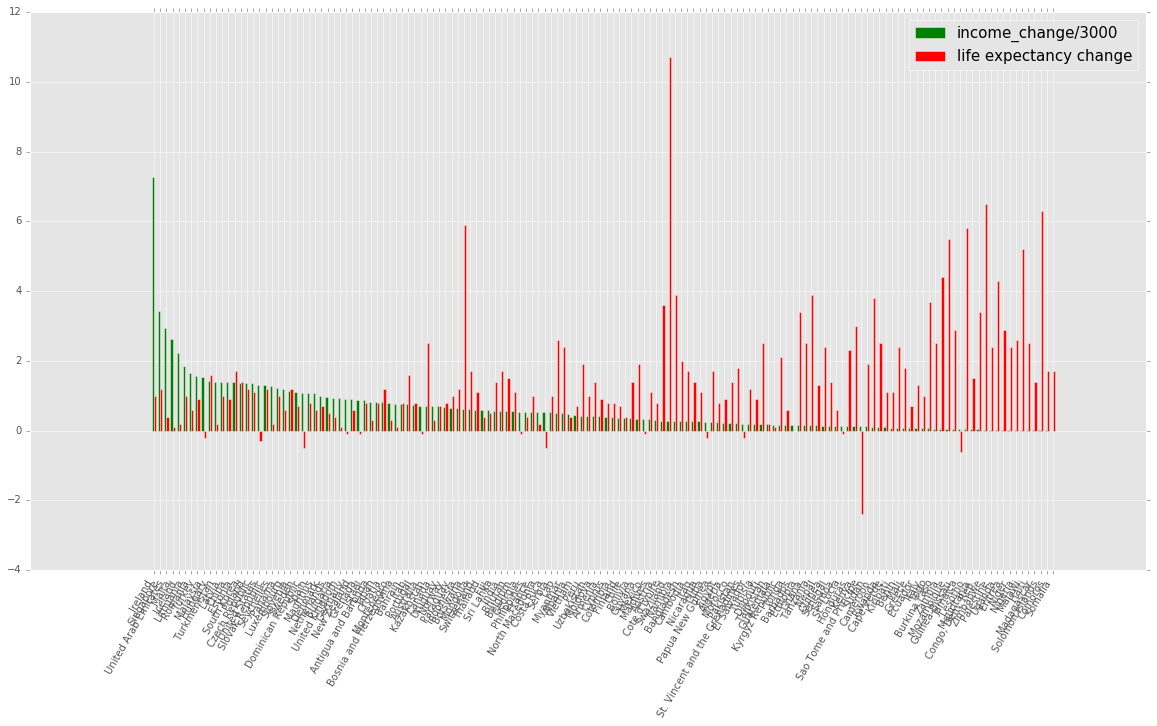

In [1056]:
#make the plot
#Since we only want to understand the relationship, font size does not affect much 
#Since income per person has larger unit, I divided it by 3000 to reduce the height of bars 

plt.style.use('ggplot')
fig,ax0 = plt.subplots(figsize=(20,10))
x = np.arange(len(df_1.index))
barwidth = 0.35
ax0.bar(x - barwidth/2 ,df_1.income_change/3000,barwidth,color = 'g',label = 'income_change/3000')
ax0.bar(x + barwidth/2 ,df_1.life_expectancy_change,barwidth,color = 'r',label = 'life expectancy change')
ax0.set_xticks(x)
ax0.set_xticklabels(df_1.index, rotation = 60,horizontalalignment= 'right',fontsize = 10)
ax0.legend(fontsize = 15)
ax0.margins(tight = True)


plt.show()


**Conclusion**: From this grouped bar chart, we notice that when income change is greater than 0, countries that locate in the latter part of the graph have bigger life expectancy change. Therefore, as long as people are making more money in 2017 than in 2012, earning more money will more likely to form shorter life expectancy. 

### Question: Does higher GDP per capita lead to the result of more children being concieved in a household?
(Assume there is only 1 woman per household)

Since we want to analyze all countries, I will make two grouped bar charts to fit in the screen better. The first graph will contain all countries that have positive income_change, and the second graph will include those countries that have negative income_change. I will continue to use df_1 from last question (income_change>0) for the first graph and make a new dataframe called df_2 for the second graph. Again, I will divide income_change by 3000 to reduce the height of bars. The order of countries is descending based on its income_change. Since there are too many countries, and we only want to understand the relationship between income_change and child_num_change, font size of x-ticklabels does not affect much here.  

In [1032]:
#dataframe with income_change<0 

df_2 = df_a.query('income_change <0' )
df_2.head()

,child_num_mean,child_num_change,income_mean,income_change,internet_mean,internet_change,life_expectancy_mean,life_expectancy_change
country,,,,,,,,
Afghanistan,4.908333,-0.90,1778.33,-10,7.97,5.15,61.52,2.6
Gambia,5.510000,-0.28,1468.33,-10,15.92,6.10,64.97,1.5
Sierra Leone,4.626667,-0.56,1483.33,-10,7.08,9.30,58.43,3.5
North Korea,1.928333,-0.06,1730.00,-10,0.00,0.00,71.53,0.9
Liberia,4.686667,-0.36,1223.33,-30,5.29,4.72,62.48,2.1


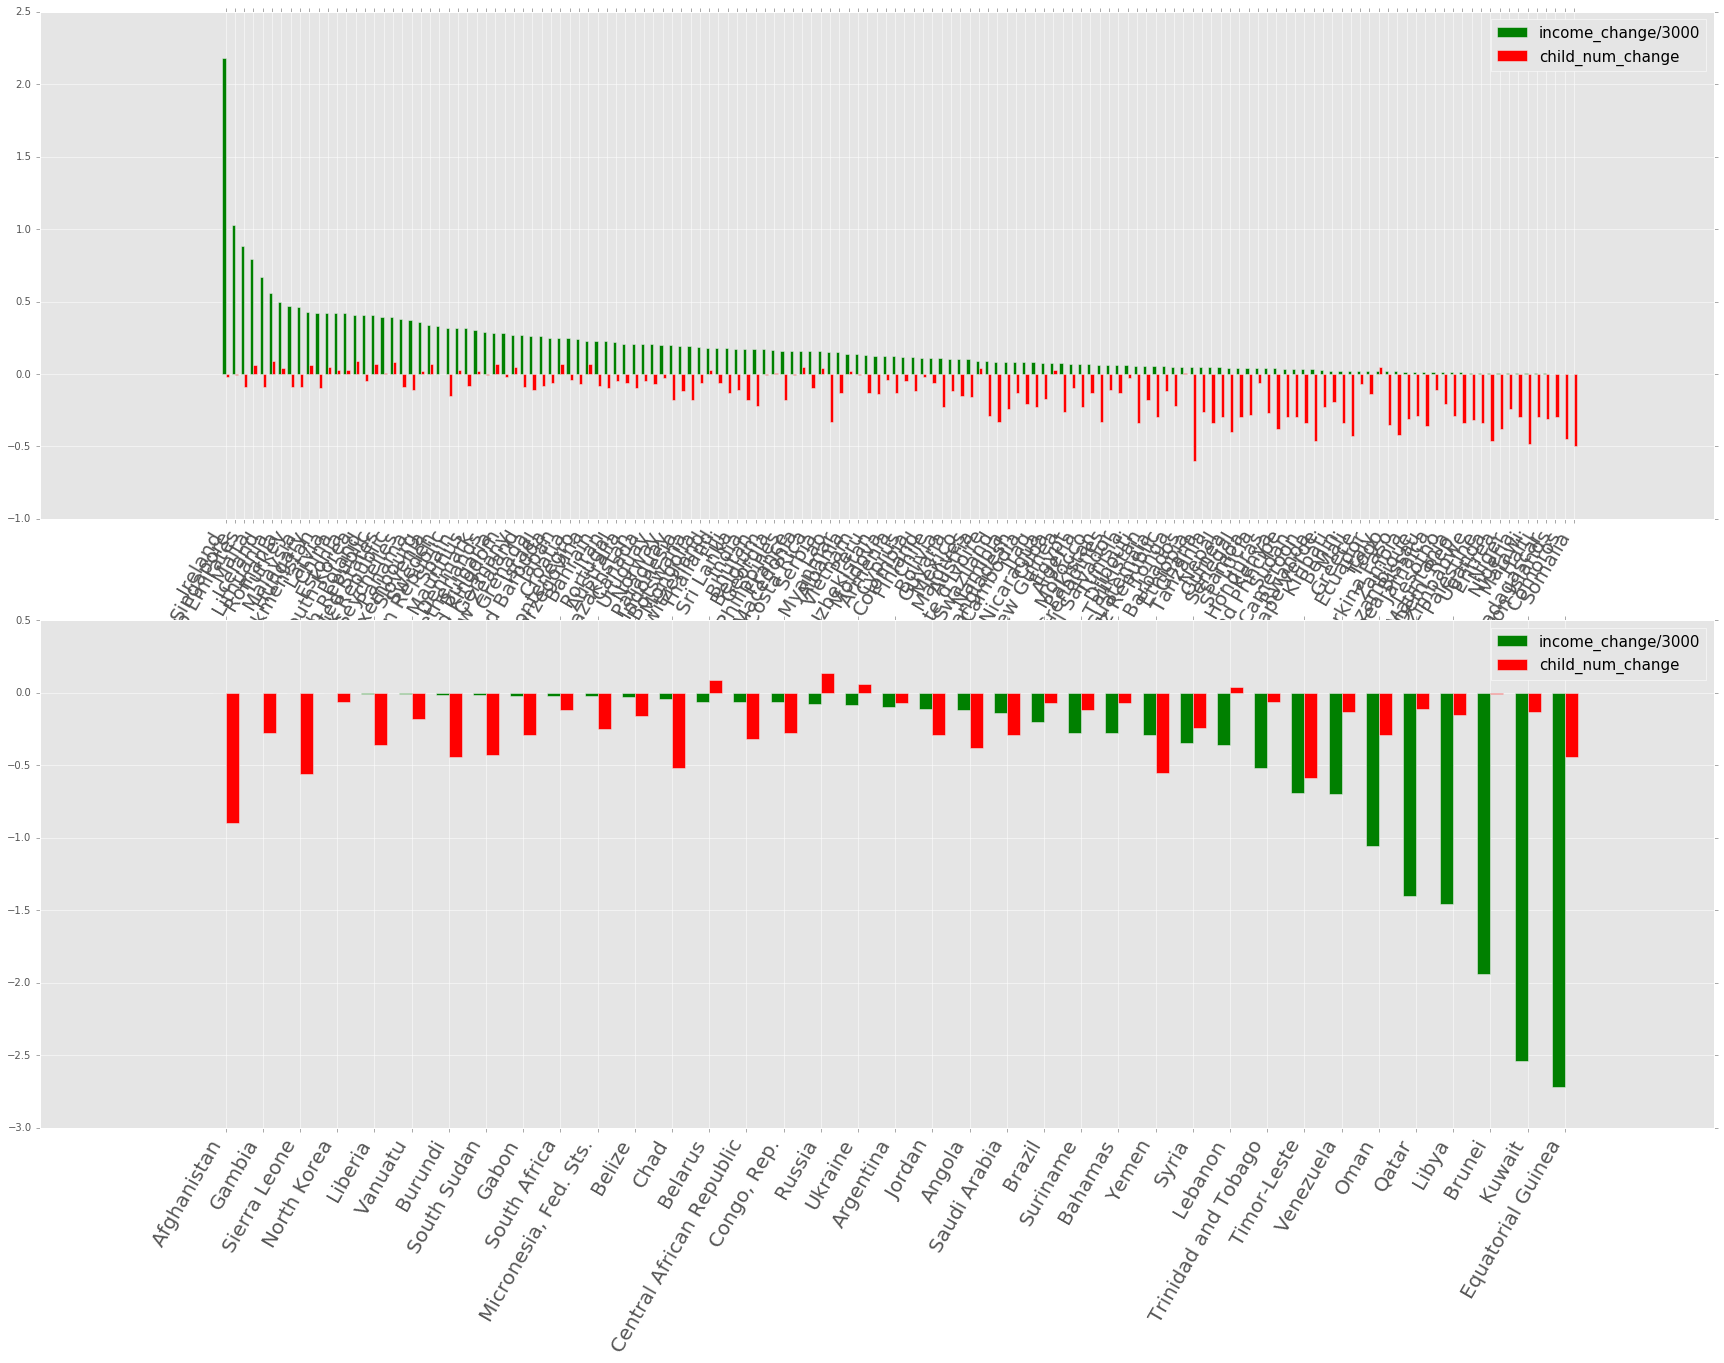

In [1046]:
#create the grouped bar charts
fig,(ax0,ax1) = plt.subplots(nrows = 2,ncols=1, figsize=(30,20))
x = np.arange(len(df_1.index))
y = np.arange(len(df_2.index))
barwidth = 0.35
ax0.bar(x - barwidth/2 ,df_1.income_change/10000,barwidth,color = 'g',label = 'income_change/3000')
ax0.bar(x + barwidth/2 ,df_1.child_num_change,barwidth,color = 'r',label = 'child_num_change')
ax0.set_xticks(x)
ax0.set_xticklabels(df_1.index, rotation = 60,horizontalalignment= 'right',fontsize = 20)
ax0.legend(fontsize = 15)
ax0.margins(tight = True)

ax1.bar(y - barwidth/2 ,df_2.income_change/5000,barwidth,label = 'income_change/3000',color = 'g')
ax1.bar(y + barwidth/2 ,df_2.child_num_change,barwidth,color = 'r',label = 'child_num_change')
ax1.set_xticks(y)
ax1.set_xticklabels(df_2.index, rotation = 60,horizontalalignment= 'right',fontsize = 20)
ax1.legend(fontsize = 15)

plt.show()

**Conclusion**: We cannot see much relationships between income change and number of children per woman change when the income per person is very huge or very little (front part the graph 1 and latter part of graph 2). However, the number of children per woman shows significantly decreasing tendency from 2012 to 2017 in countries where the increase in income per person is close to 0. We can conclude that when the change in income is subtle through these 6 years, people are more conscious about limiting fertility rates than when the change in income is drastic. 

### Question: What is the difference of Internet users percentages between countries that have the highest and lowest income per person?

In [1047]:
#find out the countries that have the highest and lowest income per person 
income_max = df.income_mean.idxmax()
income_min = df.income_mean.idxmin()
income_max,income_min

('Qatar', 'Somalia')

In [1051]:
#find out the internet_mean of these two countries
Qatar_internet_mean = df.loc['Qatar','internet_mean']
Somalia_internet_mean = df.loc['Somalia','internet_mean']
list_a = Qatar_internet_mean,Somalia_internet_mean
print(list_a)

(87.93, 1.67)


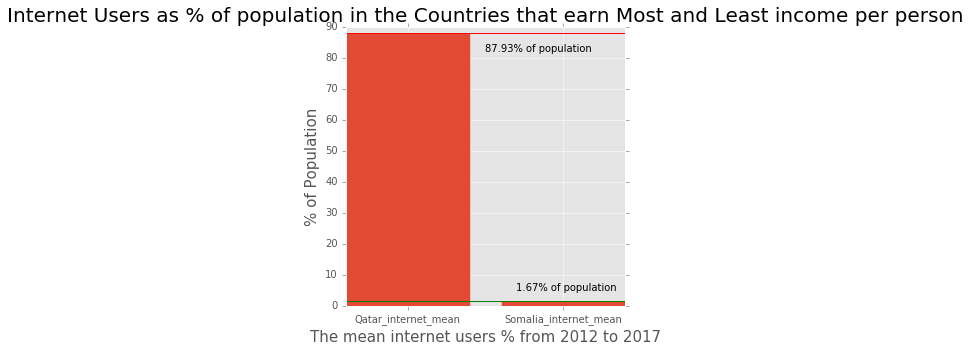

In [1057]:
#create the plot
plt.subplots(figsize=(5, 5))

plt.bar(['Qatar_internet_mean', 'Somalia_internet_mean'],list_a)
plt.title('Internet Users as % of population in the Countries that earn Most and Least income per person',fontsize=20)

plt.xlabel('The mean internet users % from 2012 to 2017',fontsize = 15)
plt.ylabel('% of Population',fontsize = 15)

a = Qatar_internet_mean
b = Somalia_internet_mean
plt.axhline(a,color = 'r')
plt.axhline(b,color = 'g')

plt.text(0.5,82,"87.93% of population")
plt.text(0.7,5,"1.67% of population");


**Conclusion**: The country that has the highest income per person, Qatar, has 87.93% of the total population consume Internet. However, only 1.67% of population in Somilia, the country that has the lowest income per capita, uses Internet. Nonetheless, we cannot conclude any correlation between income and Internet consumption based on this graph since there is no trends being shown. 

<a id='conclusions'></a>
## Conclusions


From the analysis above, we can make some conclustions around the **income per person** factor. We can claim that when the change in income is greater than 0, people who make much more money every year will be less likely to have longer life expectency. We can only guess that these groups are under lots of stress to prevent them from taking good care of their health. And these people are not likely to increase fertility rates than people who have less increase in income. One assumption about this phenomenon could be that women in these families are contributing more towards business rather than staying at home. Thus, the chance of conceiving more children goes down. Lastly, Qatar, as the country that has the highest income per person, consists of 87.93% of population that uses Internet. This percentage is 86.26 higher than the percentage derived from the country that owns the least income per capita, which is Somilia. This huge difference in percentages is understandable since we are looking at two countries that are on the extreme ends of the spectrum. As of now, we cannot know any correlation or causation between these factors because we did not make graphs with trends to collect corrlations. In terms of causatoin, better technology could come from better income situations. But higher income could also be produced by the greater use of technology. 